### Analyzing the insurance premium prediction given dataset

# INSURANCE PREMIUM PREDICTION

## TASK UNDERTAKING
**Data:** Insurance data
**what task i am undertaking :**
- The objective of this project is to provide individuals with a subtle estimation of their financial requirements based on their unique health situation. Subsequently, customers can collaborate with any health insurance carrier of their preference, exploring a diverse range of comprehensive plans and advantages, all while keeping the projected cost from our meticulous study in mind. This subtle approach assists individuals in focusing on the essential aspects of their insurance policy, leaving aside the less impactful elements.
- This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. The attributes are a mix of numeric and categorical variables.
There are no missing or undefined values in the dataset
- My task is to predict the insurance premium price for the customer which are best suitable for them

#### Importing necessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Reading the data

In [3]:
#loading the csv file
df = pd.read_csv("C:\\Users\\hp\\Downloads\\data.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


#### checking null values in the dataframe


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
#### Checking number row and columns and shape of the data
df.shape

(1338, 7)

In [8]:
#checking number of rows and columns
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 1338
Number of columns : 7


#### checking unique values in each Feature 

In [9]:
#unique elements in features
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

#### checking about the datatypes

In [10]:
#checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- As we can see in above that 3 features(sex, smoker, region) are of object type so later we have to encode them
- Remain elemnts age, children are of int type and bmi, expenses are of float type

#### Statistics of the dataset

In [11]:
#checking the statistics of the given the data which will give us the overview of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


<AxesSubplot:>

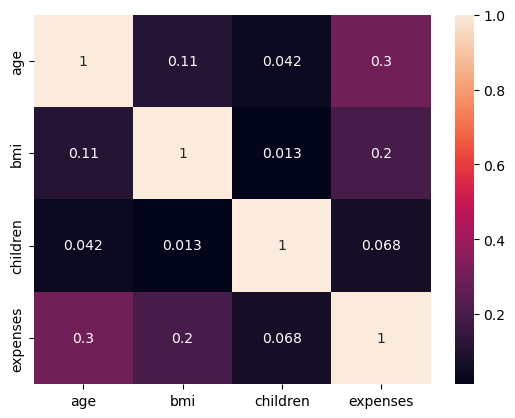

In [59]:
sns.heatmap(df.corr(), annot=True)

###  Visualizing the data through Univariate analysis 

In [12]:
num_feature = [column for column in df.columns if df[column].dtype !='O']
cat_feature = [column for column in df.columns if df[column].dtype =='O']
print(f'Numeric Features are : {num_feature}')
print(f'\n categorical Features are : {cat_feature}')

Numeric Features are : ['age', 'bmi', 'children', 'expenses']

 categorical Features are : ['sex', 'smoker', 'region']


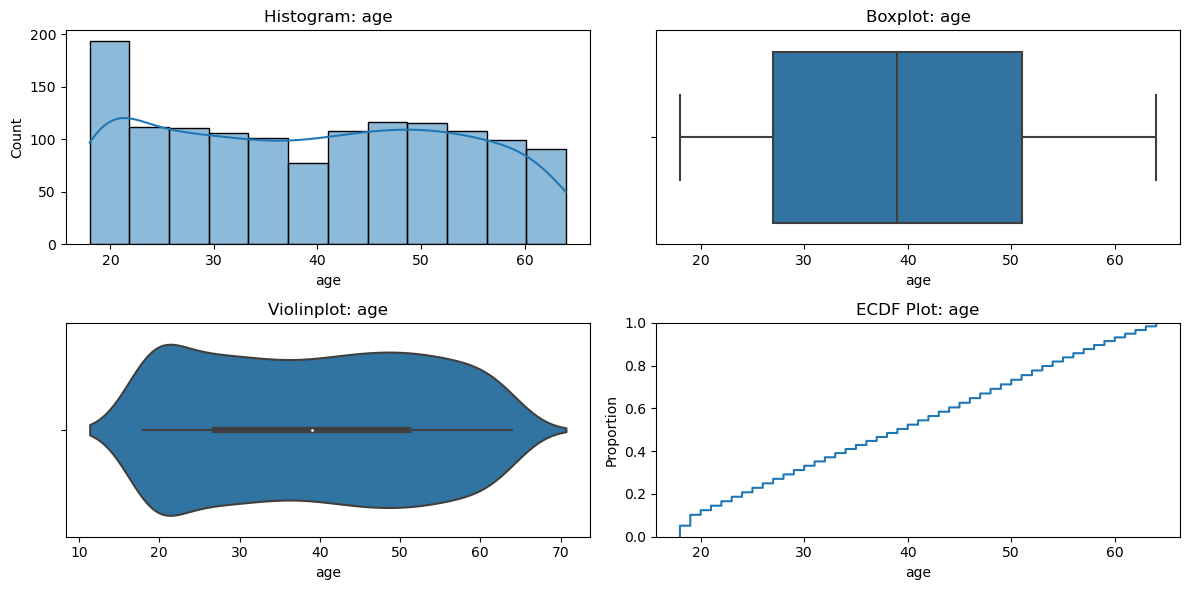

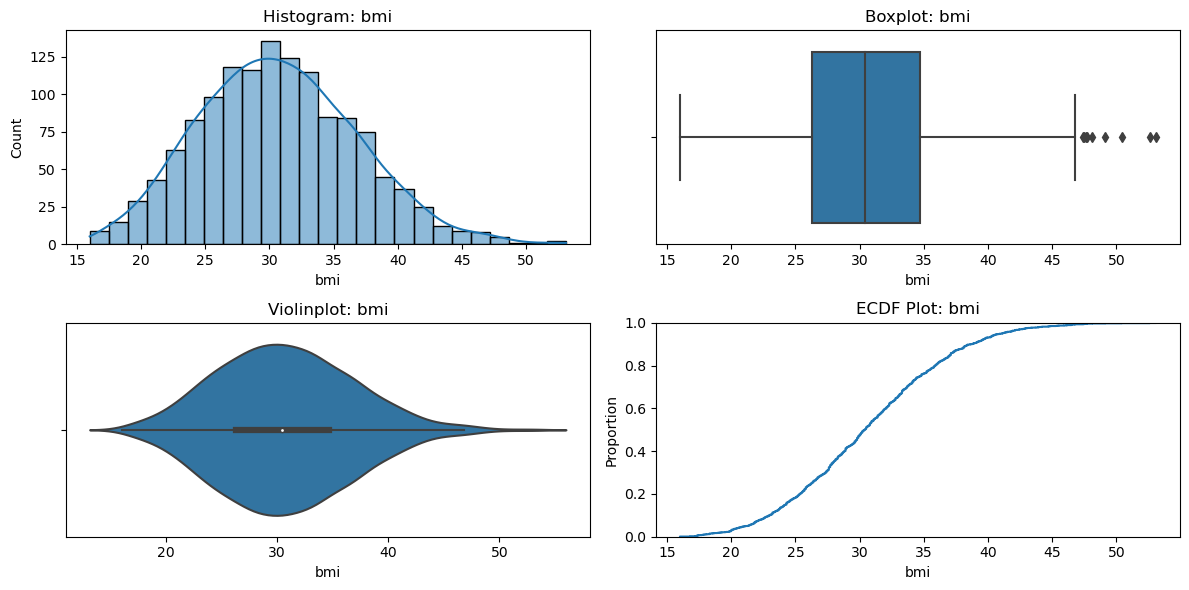

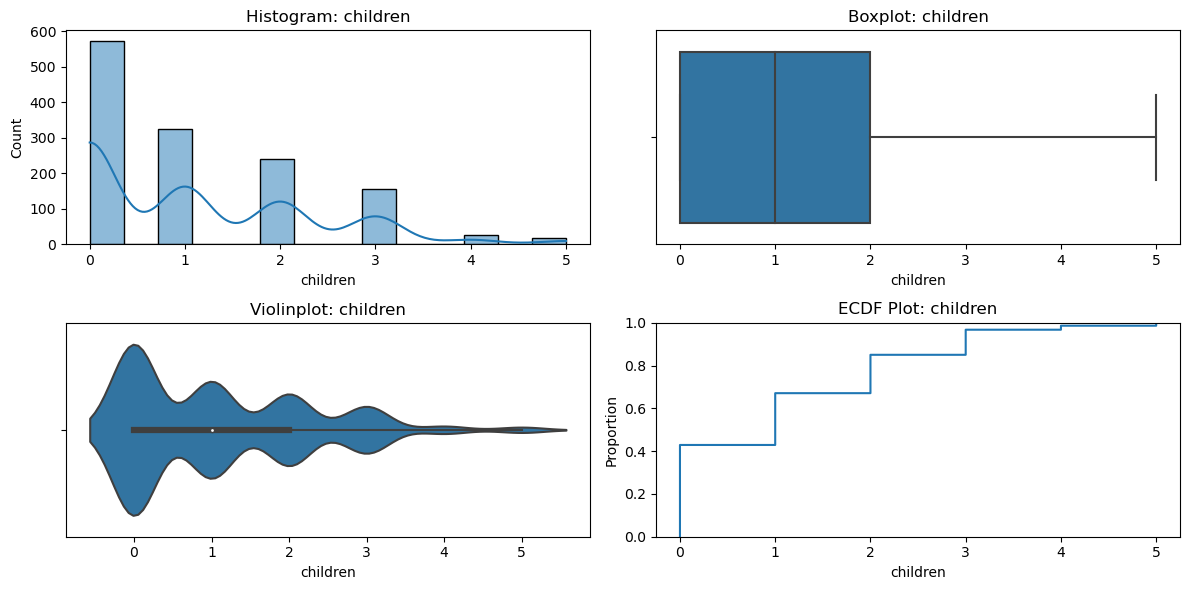

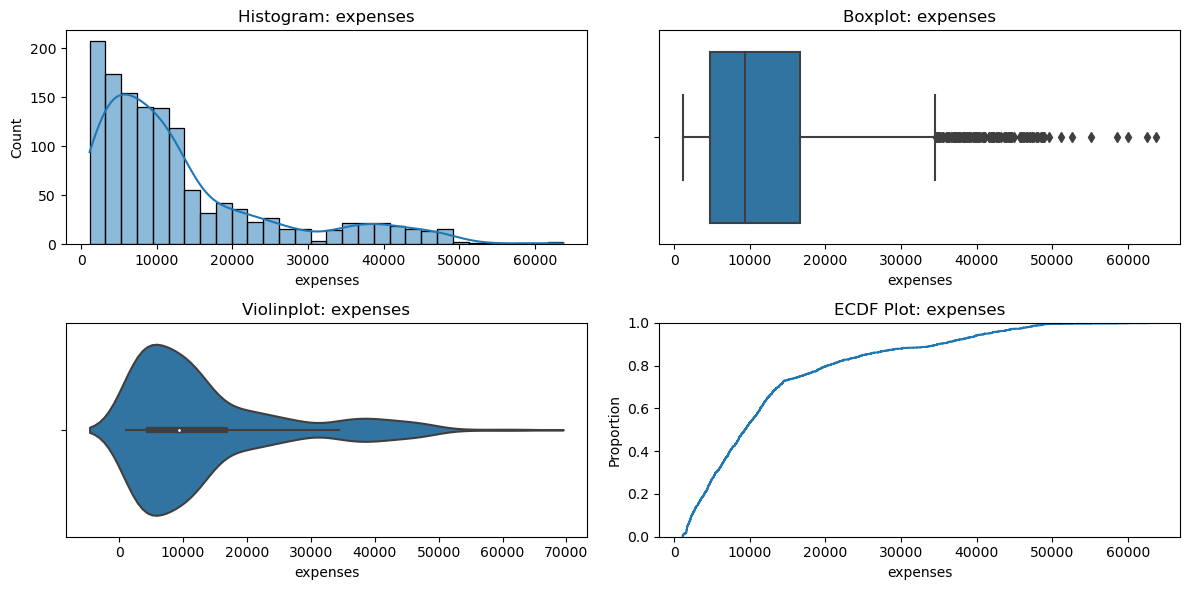

In [13]:
def plot_univariate_analysis(df):
    numeric_cols = df.select_dtypes(include='number')

    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(2, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram: {col}')
        
        plt.subplot(2, 2, 2)
        sns.boxplot(df[col])
        plt.title(f'Boxplot: {col}')
        
        plt.subplot(2, 2, 3)
        sns.violinplot(df[col])
        plt.title(f'Violinplot: {col}')
        
        plt.subplot(2, 2, 4)
        sns.ecdfplot(df[col])
        plt.title(f'ECDF Plot: {col}')
        
        plt.tight_layout()
        plt.show()
plot_univariate_analysis(df)


#### As we can see above the distribution of numerical features in the dataset we can make following conclusion
- People are around 20 age are more as compared to other age groups
- bmi is uniformly distributed with some minor outliers

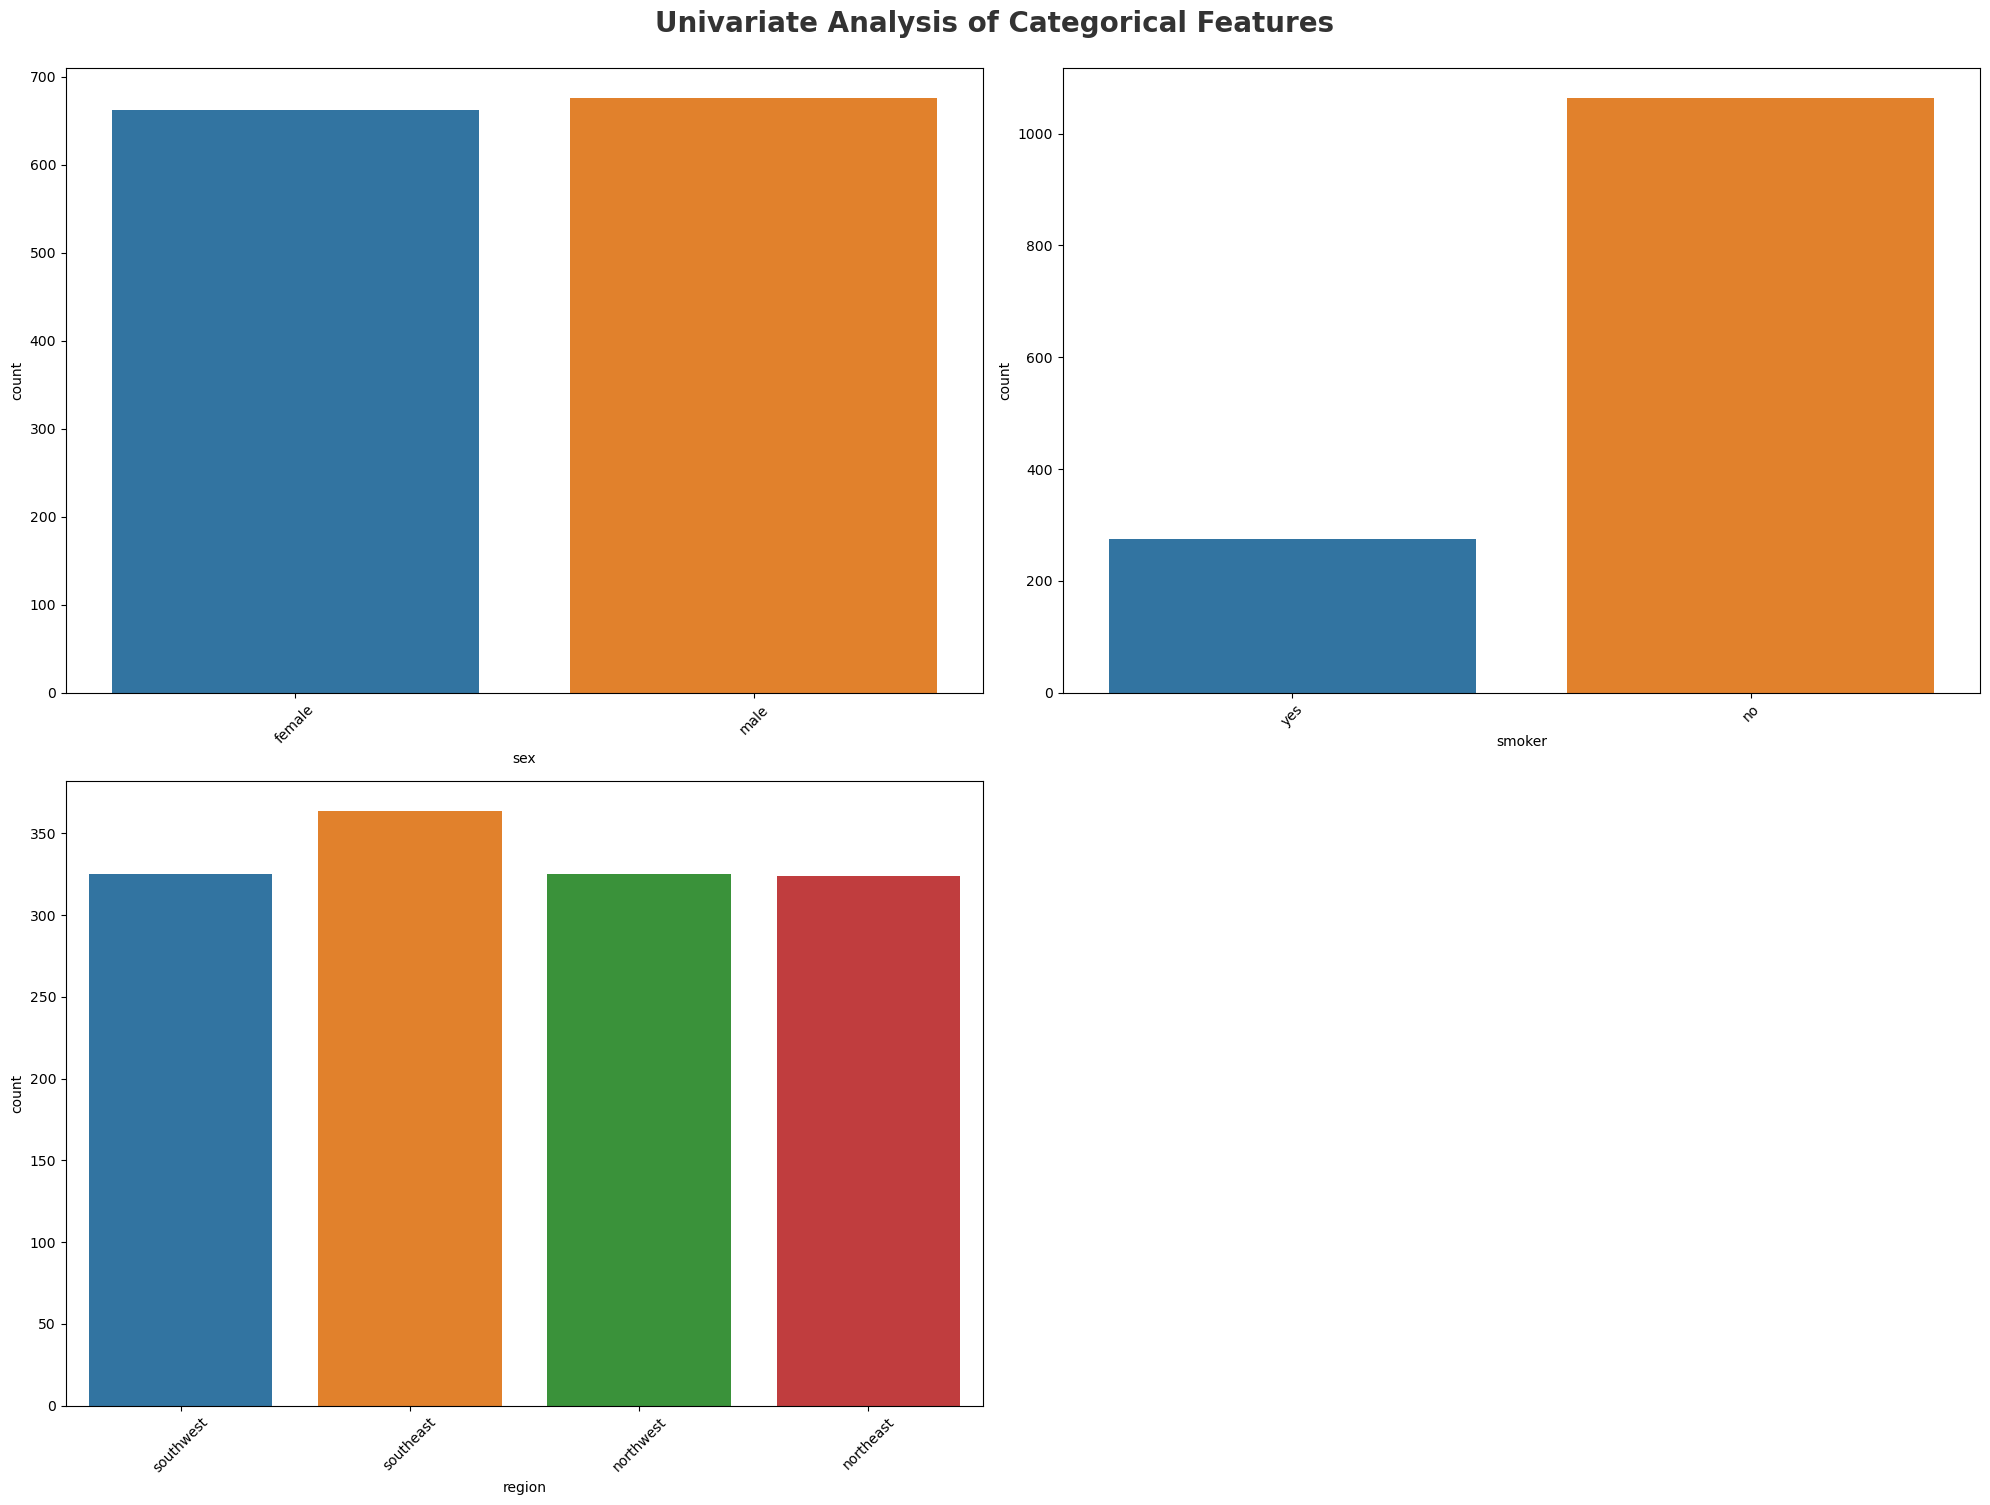

In [39]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['sex', 'smoker', 'region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

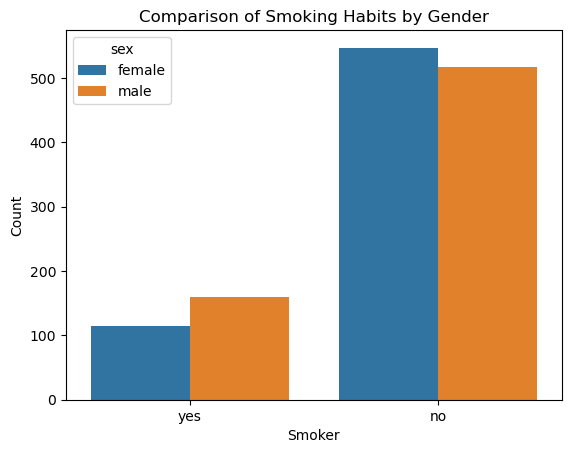

In [14]:
sns.countplot(data=df, x='smoker', hue='sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Comparison of Smoking Habits by Gender')
plt.show()

#### As we can see above the distribution of numerical features in the dataset we can make following conclusion
- we can see in above that male smokers are more than female smokers
- And in no somoking category we can see that more female does not smoke than male

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


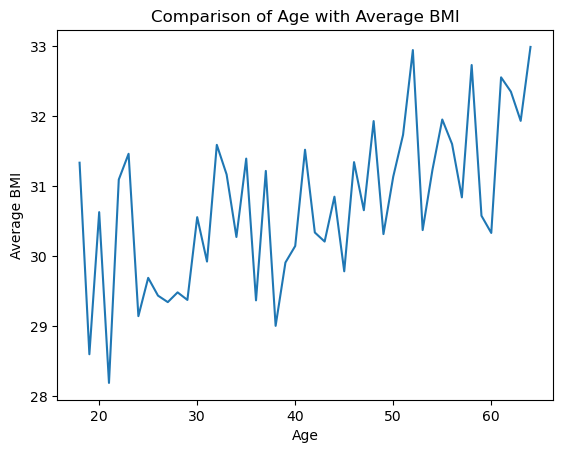

In [24]:
average_bmi_by_age = df.groupby('age')['bmi'].mean()

plt.plot(average_bmi_by_age.index, average_bmi_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.title('Comparison of Age with Average BMI')
plt.show()

#### we can see in above as the age increases bmi increases but bmi can be high in young age in rare cases

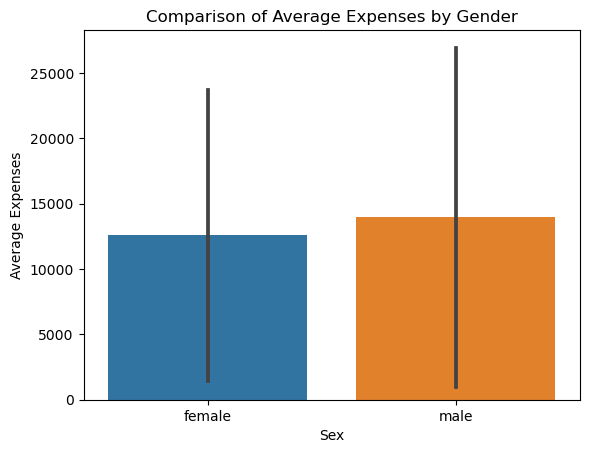

In [26]:
sns.barplot(data=df, x='sex', y='expenses', estimator=np.mean, ci='sd')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.title('Comparison of Average Expenses by Gender')
plt.show()

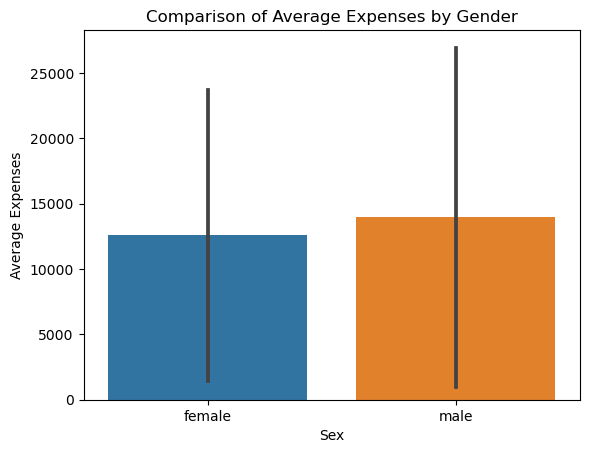

In [31]:
sns.barplot(data=df, x='sex', y='expenses', estimator=np.mean, ci='sd')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.title('Comparison of Average Expenses by Gender')
plt.show()

#### As we can see in above that average expenses by male is higher than that of female

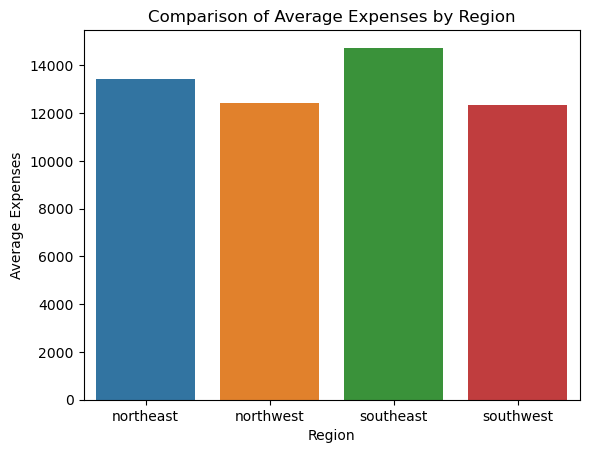

In [37]:
average_expenses_by_region = df.groupby('region')['expenses'].mean()

# Create a bar plot to compare the average expenses by region
sns.barplot(x=average_expenses_by_region.index, y=average_expenses_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.title('Comparison of Average Expenses by Region')
plt.show()

#### As we can in the above graph that southeast region has more avg expenses than other regions

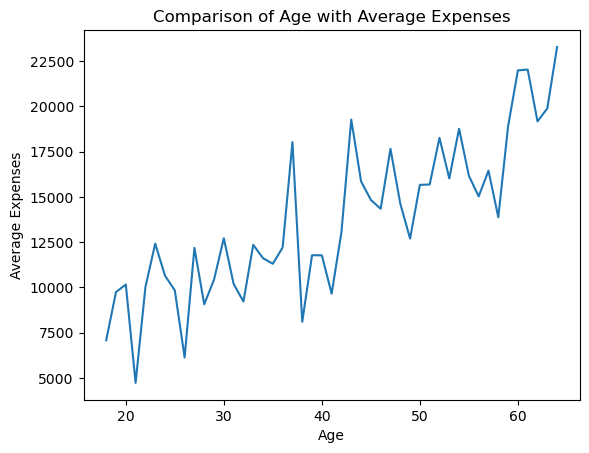

In [39]:
average_expenses_by_age = df.groupby('age')['expenses'].mean()

plt.plot(average_expenses_by_age.index, average_expenses_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Expenses')
plt.title('Comparison of Age with Average Expenses')
plt.show()

#### By observing above we can see the pattern that as we get older our expenses on insurance increases

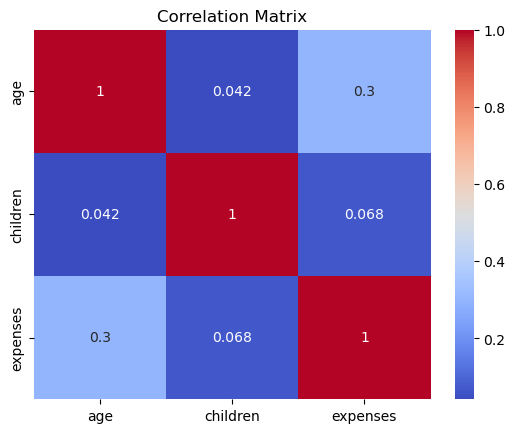

In [41]:
correlation_matrix = df[['age', 'sex', 'children', 'expenses']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

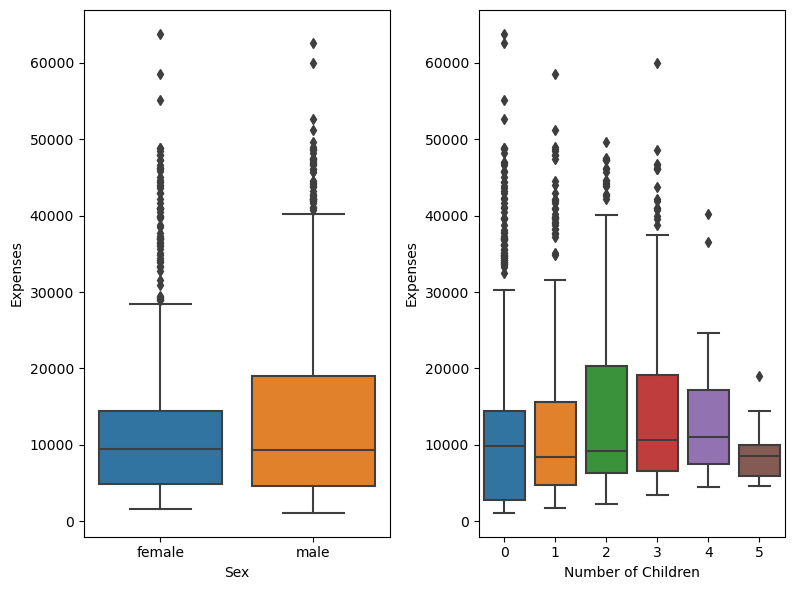

In [47]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='sex', y='expenses')
plt.xlabel('Sex')
plt.ylabel('Expenses')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='children', y='expenses')
plt.xlabel('Number of Children')
plt.ylabel('Expenses')


plt.tight_layout()
plt.show()

### checking the outliers in data

In [46]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
threshold = 3

outlier_indices = np.where(z_scores > threshold)
outliers = df.iloc[outlier_indices[0]]

print('Outlier Rows:')
print(outliers)

Outlier Rows:
      age     sex   bmi  children smoker     region  expenses
32     19  female  28.6         5     no  southwest   4687.80
34     28    male  36.4         1    yes  southwest  51194.56
71     31    male  28.5         5     no  northeast   6799.46
116    58    male  49.1         0     no  southeast  11381.33
166    20  female  37.0         5     no  southwest   4830.63
413    25    male  23.9         5     no  southwest   5080.10
425    45    male  24.3         5     no  southeast   9788.87
438    52  female  46.8         5     no  southeast  12592.53
543    54  female  47.4         0    yes  southeast  63770.43
568    49  female  31.9         5     no  southwest  11552.90
577    31  female  38.1         1    yes  northeast  58571.07
640    33    male  42.4         5     no  southwest   6666.24
819    33  female  35.5         0    yes  northwest  55135.40
847    23    male  50.4         1     no  southeast   2438.06
877    33    male  33.4         5     no  southeast   66

#### dropping the outliers

#### comparing features with target column

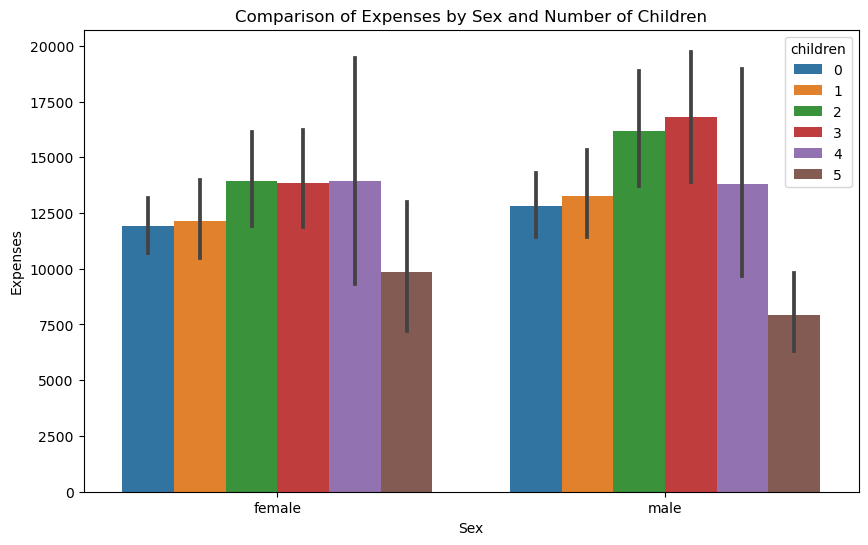

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="sex", y="expenses", hue="children")
plt.xlabel("Sex")
plt.ylabel("Expenses")
plt.title("Comparison of Expenses by Sex and Number of Children")
plt.show()

### Feature Engineering

In [60]:
df_cleaned = df.drop(outlier_indices[0])

In [61]:
df_cleaned

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## encoding categorical columns

In [ ]:
#### encoding sex feature

In [64]:
df_cleaned['sex'].unique()

array(['female', 'male'], dtype=object)

In [65]:
df_cleaned['sex']=df_cleaned['sex'].map({'female':0,'male':1})

In [66]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


#### encoding smoker feature

In [67]:
df_cleaned['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [68]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

#### encoding region feature

In [71]:
df_cleaned.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [72]:
df_cleaned['region']=df_cleaned['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [73]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


## Creating dependent and independent variable

In [74]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [77]:
X = df_cleaned.drop('expenses', axis=1)
y=df_cleaned['expenses']

In [78]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [79]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

# Spliting the data into Train and Test set 
- Train the model(s) on training set
- Test the Model(s) on Testing set

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
y_train

784      4350.51
552     12957.12
294      3906.13
10       2721.32
151      7789.64
          ...   
1117    36124.57
1154    11015.17
1323    43896.38
874      8891.14
1150     2203.74
Name: expenses, Length: 1047, dtype: float64

#### Importing the models

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Linear Regression

In [132]:
linear_reg = LinearRegression()

In [134]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred_linear_reg = linear_reg.predict(X_test)

#### Support vector Regressor

In [137]:
support_vector_reg = SVR()

In [138]:
support_vector_reg.fit(X_train, y_train)

SVR()

In [139]:
y_pred_svr = support_vector_reg.predict(X_test)

#### Random forest regressor

In [142]:
random_forest_reg = RandomForestRegressor()

In [143]:
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [144]:
y_pred_random_for = random_forest_reg.predict(X_test)

#### Gradient Boosting Regressor

In [147]:
grad_boost_reg = GradientBoostingRegressor()

In [148]:
grad_boost_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [149]:
y_pred_grad_boost = grad_boost_reg.predict(X_test)

In [151]:
Prediction_df = pd.DataFrame({'Actual':y_test,'Linear regression':y_pred_linear_reg,
                  'Support vector regressor':y_pred_svr,'Random forest regressor':y_pred_random_for,'Gradient Boosting Regressor':y_pred_grad_boost})

In [152]:
Prediction_df

,Actual,Linear regression,Support vector regressor,Random forest regressor,Gradient Boosting Regressor
1172,11093.62,15569.759973,9475.582559,16552.9920,13947.281171
1069,10928.85,12454.422556,9466.767731,15006.5551,14059.127316
1001,34472.84,27109.405290,9284.316086,35424.6620,35548.249696
821,2680.95,581.623055,9296.172267,9661.9425,9110.233054
1219,7537.16,9330.162733,9359.738844,7194.8048,7864.081923
...,...,...,...,...,...
583,17626.24,4213.650922,9321.287262,4656.3872,5004.289509
144,20745.99,29882.839620,9310.773506,20503.1329,20615.834552
1206,36910.61,14792.096544,9492.762046,14282.9469,13667.830871
317,10435.07,12957.429280,9466.931420,11523.7111,12460.128432


#### Comparing the model Visually to get the best idea

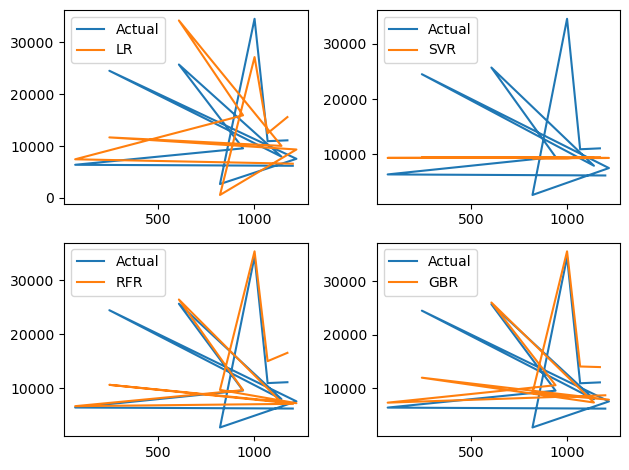

In [157]:
plt.subplot(221)
plt.plot(Prediction_df['Actual'].iloc[0:11],label='Actual')
plt.plot(Prediction_df['Linear regression'].iloc[0:11],label="LR")
plt.legend()

plt.subplot(222)
plt.plot(Prediction_df['Actual'].iloc[0:11],label='Actual')
plt.plot(Prediction_df['Support vector regressor'].iloc[0:11],label="SVR")
plt.legend()

plt.subplot(223)
plt.plot(Prediction_df['Actual'].iloc[0:11],label='Actual')
plt.plot(Prediction_df['Random forest regressor'].iloc[0:11],label="RFR")
plt.legend()

plt.subplot(224)
plt.plot(Prediction_df['Actual'].iloc[0:11],label='Actual')
plt.plot(Prediction_df['Gradient Boosting Regressor'].iloc[0:11],label="GBR")

plt.tight_layout()

plt.legend()

#### Which model perform the best

#### r2_score

In [158]:
from sklearn.metrics import r2_score

In [159]:
score_lr = metrics.r2_score(y_test, y_pred_linear_reg)
score_svr = metrics.r2_score(y_test, y_pred_svr)
score_rfr = metrics.r2_score(y_test, y_pred_random_for)
score_gbr = metrics.r2_score(y_test, y_pred_grad_boost)

In [160]:
print(f'r2_score of linear regression is : {score_lr}')
print(f'r2_score of support vector regression is : {score_svr}')
print(f'r2_score of random forest regressor  is : {score_rfr}')
print(f'r2_score of gradient boosting regressor is : {score_gbr}')

r2_score of linear regression is : 0.7783731111542613
r2_score of support vector regression is : -0.11242018905088003
r2_score of random forest regressor  is : 0.867297115515024
r2_score of gradient boosting regressor is : 0.8942523489768426


#### Mean absolute error

In [161]:
mae_lr = metrics.mean_absolute_error(y_test,y_pred_linear_reg)
mae_svr = metrics.mean_absolute_error(y_test,y_pred_svr)
mae_rfr = metrics.mean_absolute_error(y_test,y_pred_random_for)
mae_gbr = metrics.mean_absolute_error(y_test,y_pred_grad_boost)

In [162]:
print(f'Mean absolute error of linear regression is : {mae_lr}')
print(f'Mean absolute error of support vector regression is : {mae_svr}')
print(f'Mean absolute error of random forest regressor  is : {mae_rfr}')
print(f'Mean absolute error of gradient boosting regressor is : {mae_gbr}')

Mean absolute error of linear regression is : 3966.3091265914654
Mean absolute error of support vector regression is : 8305.402978656353
Mean absolute error of random forest regressor  is : 2287.571088469647
Mean absolute error of gradient boosting regressor is : 2074.013709901751


#### By observing the performance of various models we can conclude that gradient boosting regressor is the best model which is giving us the best performance by checking r2_score and mean absolute error

#### lets check the model for new data 

In [163]:
data = {'age' : 27,
        'sex' : 1,
        'bmi' : 24.2,
        'children' : 0,
        'smoker' : 0,
        'region' : 2}

rohit = pd.DataFrame(data,index=[0])
rohit

,age,sex,bmi,children,smoker,region
0,27,1,24.2,0,0,2


In [164]:
rohit_predict = grad_boost_reg.predict(rohit)

In [2]:
'''print(f'Medical insurance cost for rohit is : {rohit_predict}')'''

"print(f'Medical insurance cost for rohit is : {rohit_predict}')"

In [166]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


# Saving the model

In [168]:
import joblib

In [169]:
joblib.dump(grad_boost_reg,'gradient_boosting_model_test')

['gradient_boosting_model_test']

In [170]:
grad_boost = joblib.load('gradient_boosting_model_test')

In [172]:
grad_boost.predict([[27,1,24.2,0,0,2]])

array([3626.39892911])

# Creating GUI using tkinter

In [173]:
from tkinter import *

In [178]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('gradient_boosting_model_test')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)


master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()